In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt


In [6]:
years = range(1880, 2011)

In [7]:
pieces = []
columns = ['Name', 'Gender', 'Count']

In [8]:
for year in years:
    path = 'yob%d.csv' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [9]:
names = pd.concat(pieces, ignore_index=True)

In [10]:
names

Name Gender  Count  year
0             Mary      F   7065  1880
1             Anna      F   2604  1880
2             Emma      F   2003  1880
3        Elizabeth      F   1939  1880
4           Minnie      F   1746  1880
...            ...    ...    ...   ...
1690779    Zymaire      M      5  2010
1690780     Zyonne      M      5  2010
1690781  Zyquarius      M      5  2010
1690782      Zyran      M      5  2010
1690783      Zzyzx      M      5  2010

[1690784 rows x 4 columns]

In [11]:
total_births = names.pivot_table('Count', index='year',
                                columns='Gender', aggfunc='sum')

In [12]:
total_births

Gender        F        M
year                    
1880      90993   110493
1881      91955   100748
1882     107851   113687
1883     112322   104632
1884     129021   114445
...         ...      ...
2006    1896468  2050234
2007    1916888  2069242
2008    1883645  2032310
2009    1827643  1973359
2010    1759010  1898382

[131 rows x 2 columns]

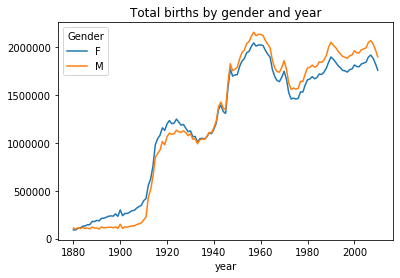

In [13]:
ax = total_births.plot(title='Total births by gender and year')

In [36]:

names['proportion'] = names.groupby(['year', 'Gender'])['Count'].apply(lambda x: x/sum(x))

In [37]:
names

Name Gender  Count  year  proportion
0             Mary      F   7065  1880    0.077643
1             Anna      F   2604  1880    0.028618
2             Emma      F   2003  1880    0.022013
3        Elizabeth      F   1939  1880    0.021309
4           Minnie      F   1746  1880    0.019188
...            ...    ...    ...   ...         ...
1690779    Zymaire      M      5  2010    0.000003
1690780     Zyonne      M      5  2010    0.000003
1690781  Zyquarius      M      5  2010    0.000003
1690782      Zyran      M      5  2010    0.000003
1690783      Zzyzx      M      5  2010    0.000003

[1690784 rows x 5 columns]

In [38]:
total_births1 = names.pivot_table('proportion', index='year',columns='Name',aggfunc='sum')
total_births1

Name     Aaban  Aabid  Aabriella     Aadam     Aadan   Aadarsh     Aaden  \
year                                                                       
1880       NaN    NaN        NaN       NaN       NaN       NaN       NaN   
1881       NaN    NaN        NaN       NaN       NaN       NaN       NaN   
1882       NaN    NaN        NaN       NaN       NaN       NaN       NaN   
1883       NaN    NaN        NaN       NaN       NaN       NaN       NaN   
1884       NaN    NaN        NaN       NaN       NaN       NaN       NaN   
...        ...    ...        ...       ...       ...       ...       ...   
2006       NaN    NaN        NaN  0.000004       NaN  0.000007  0.000027   
2007  0.000002    NaN        NaN  0.000004  0.000004  0.000006  0.000075   
2008       NaN    NaN   0.000003  0.000003  0.000011  0.000006  0.000470   
2009  0.000003    NaN        NaN  0.000005  0.000012  0.000008  0.000644   
2010  0.000005    NaN        NaN  0.000004  0.000006       NaN  0.000236   

Name    Aadesh    Aadhav  Aadhavan  ...     Zyrus  Zysean   Zyshaun   Zyshawn  \
year                                ...                                         
1880       NaN       NaN       NaN  ...       NaN     NaN       NaN       NaN   
1881       NaN       NaN       NaN  ...       NaN     NaN       NaN       NaN   
1882       NaN       NaN       NaN  ...       NaN     NaN       NaN       NaN   
1883       NaN       NaN       NaN  ...       NaN     NaN       NaN       NaN   
1884       NaN       NaN       NaN  ...       NaN     NaN       NaN       NaN   
...        ...       ...       ...  ...       ...     ...       ...       ...   
2006       NaN  0.000002       NaN  ...       NaN     NaN  0.000002  0.000002   
2007       NaN       NaN       NaN  ...       NaN     NaN  0.000003  0.000005   
2008       NaN       NaN       NaN  ...  0.000004     NaN  0.000003  0.000007   
2009  0.000003  0.000003       NaN  ...       NaN     NaN       NaN  0.000004   
2010       NaN  0.000007  0.000003  ...       NaN     NaN       NaN  0.000005   

Name  Zyshon  Zyshonne  Zytavious    Zyvion   Zyyanna     Zzyzx  
year                                                             
1880     NaN       NaN        NaN       NaN       NaN       NaN  
1881     NaN       NaN        NaN       NaN       NaN       NaN  
1882     NaN       NaN        NaN       NaN       NaN       NaN  
1883     NaN       NaN        NaN       NaN       NaN       NaN  
1884     NaN       NaN        NaN       NaN       NaN       NaN  
...      ...       ...        ...       ...       ...       ...  
2006     NaN       NaN   0.000003       NaN       NaN       NaN  
2007     NaN       NaN   0.000003       NaN       NaN       NaN  
2008     NaN       NaN        NaN       NaN       NaN       NaN  
2009     NaN       NaN   0.000004  0.000003       NaN       NaN  
2010     NaN       NaN   0.000003       NaN  0.000003  0.000003  

[131 rows x 88496 columns]

In [39]:
s= total_births1[['Johnny', 'Natalie', 'Bob', 'Yuliya']]

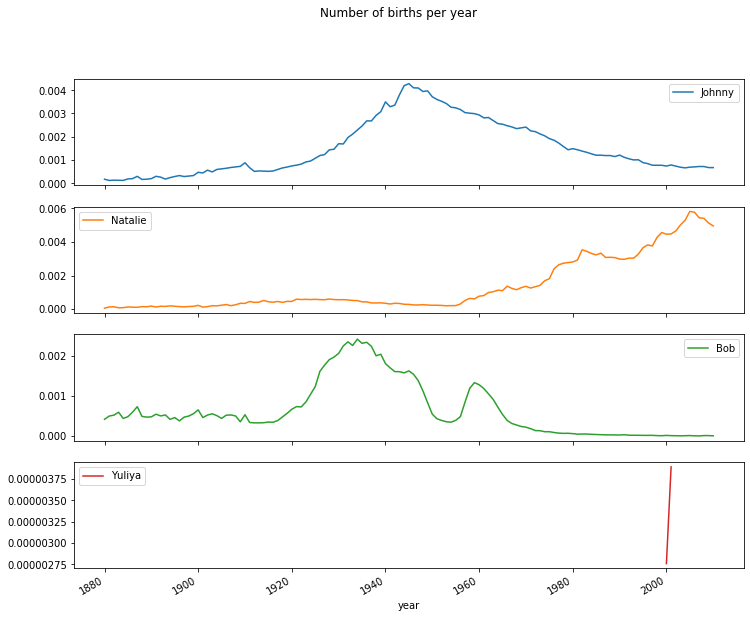

In [45]:
ax = s.plot(subplots=True, figsize=(12,10), 
           title='Number of births per year')


In [41]:

subset = total_births[['Johnny', 'Natalie', 'Bob', 'Yuliya']]

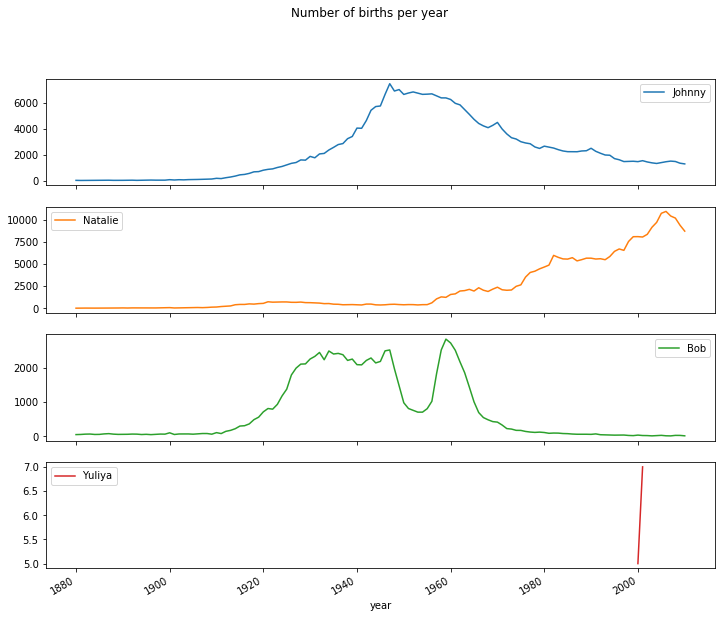

In [42]:

ax = subset.plot(subplots=True, figsize=(12,10), 
           title='Number of births per year')

In [61]:
def most_popular(series):
    return series.iloc[0]

baby_pop = names.groupby(['year', 'Gender']).agg(most_popular)
baby_pop

Name  Count  proportion
year Gender                             
1880 F           Mary   7065    0.077643
     M           John   9655    0.087381
1881 F           Mary   6919    0.075243
     M           John   8769    0.087039
1882 F           Mary   8149    0.075558
...               ...    ...         ...
2008 M          Jacob  22507    0.011075
2009 F       Isabella  22222    0.012159
     M          Jacob  21036    0.010660
2010 F       Isabella  22731    0.012923
     M          Jacob  21875    0.011523

[262 rows x 3 columns]